# Coding Interview Prep Exercise  Unit 17.2

In [1]:
# Mounting my drive on Google Colab
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing required modules
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Part 1 EDA

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

Pseudocode:
1. Load in the .json files as a time-series
2. Create a pandas dataframe with this info
3. Use a groupby function to aggregate the 15 minute time intervals
4. Graph the time series of login counts to tell a story
5. Document data quality issues

In [3]:
#1 Load and view the data in the json file; resulting loaded file is a dictionary

logins = open('/content/drive/My Drive/data/logins.json')
login_data = json.load(logins)
type(login_data) # dict
print(login_data) # appears much like the actual json file
# to print in a more user-friendly way
for i in login_data["login_time"][0:10]:
  print (i)

Output hidden; open in https://colab.research.google.com to view.

In [4]:
#2 Create dataframe, sort by time (because it is currently not sorted), 
# set index as datetime, adding an empty count column in preparation for grouping

login_df = pd.DataFrame.from_dict(login_data, orient='columns')
login_df = login_df.sort_values(by='login_time').set_index(pd.DatetimeIndex(login_df['login_time']))

login_df_datetime = login_df.set_index(pd.DatetimeIndex(login_df['login_time']))
login_df_datetime['count'] = 0
print(login_df_datetime.head(15))
login_df_datetime.info()

                              login_time  count
login_time                                     
1970-01-01 20:12:16  1970-01-01 20:12:16      0
1970-01-01 20:13:18  1970-01-01 20:13:18      0
1970-01-01 20:16:10  1970-01-01 20:16:10      0
1970-01-01 20:16:36  1970-01-01 20:16:36      0
1970-01-01 20:16:37  1970-01-01 20:16:37      0
1970-01-01 20:21:41  1970-01-01 20:21:41      0
1970-01-01 20:26:05  1970-01-01 20:26:05      0
1970-01-01 20:26:21  1970-01-01 20:26:21      0
1970-01-01 20:31:03  1970-01-01 20:31:03      0
1970-01-01 20:34:46  1970-01-01 20:34:46      0
1970-01-01 20:34:58  1970-01-01 20:34:58      0
1970-01-01 20:35:38  1970-01-01 20:35:38      0
1970-01-01 20:35:47  1970-01-01 20:35:47      0
1970-01-01 20:36:34  1970-01-01 20:36:34      0
1970-01-01 20:39:25  1970-01-01 20:39:25      0
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:12:16 to 1970-04-13 18:57:38
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
-

In [5]:
#3 Group to 15 minute time periods and count; also extract day of week and hr of day from login time and qc process worked correctly based on
# the printed results below and above

grouped = login_df_datetime.groupby('count').resample('15T')['login_time'].count().reset_index(name="15mincount")
grouped.drop(columns='count', inplace = True)
grouped['login_time'] = pd.to_datetime(grouped['login_time'])
grouped.head()

,login_time,15mincount
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


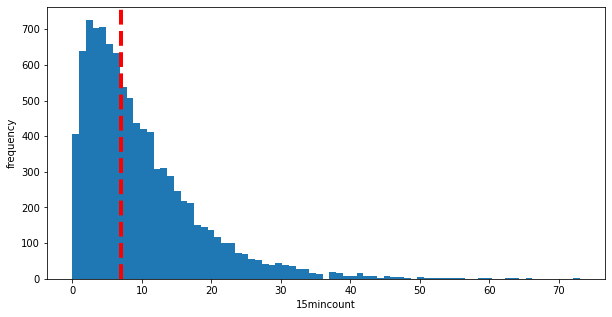

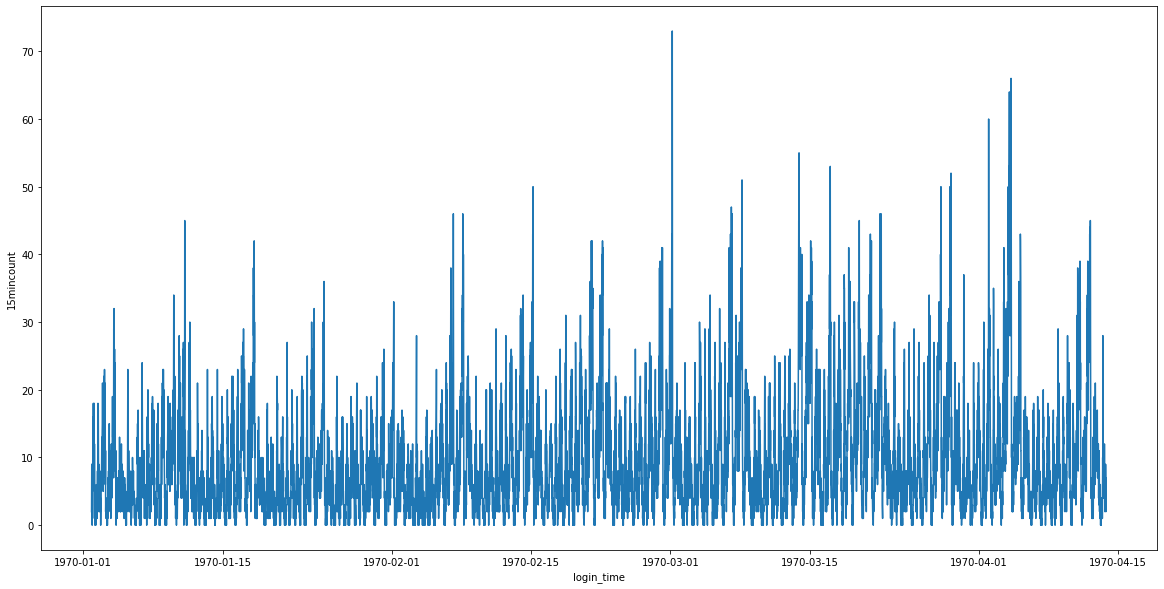

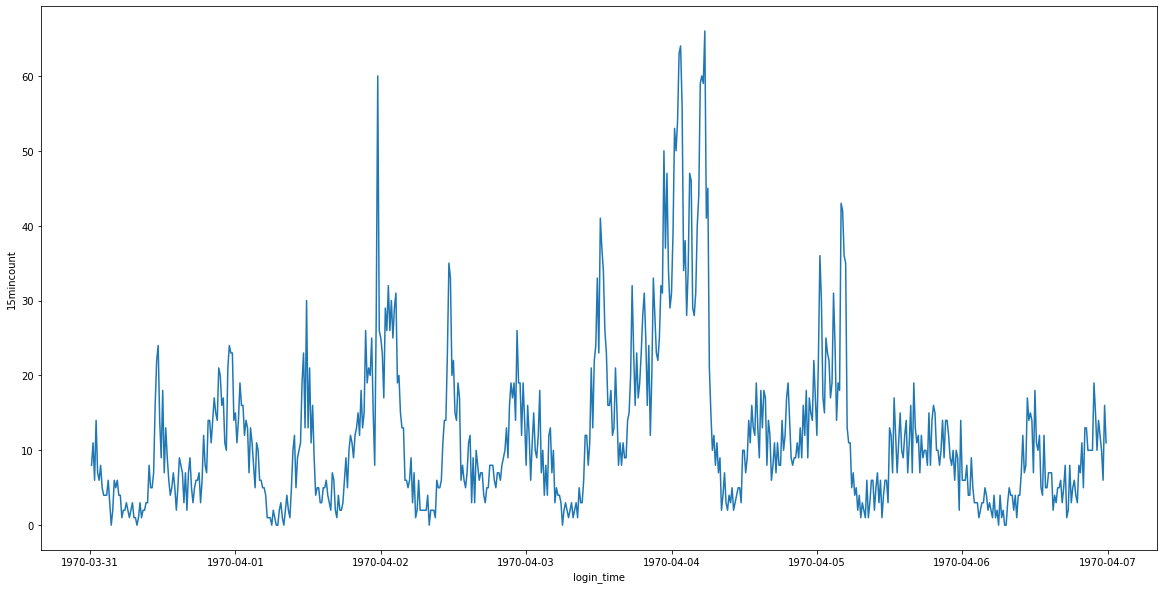

Text(0, 0.5, 'frequency')

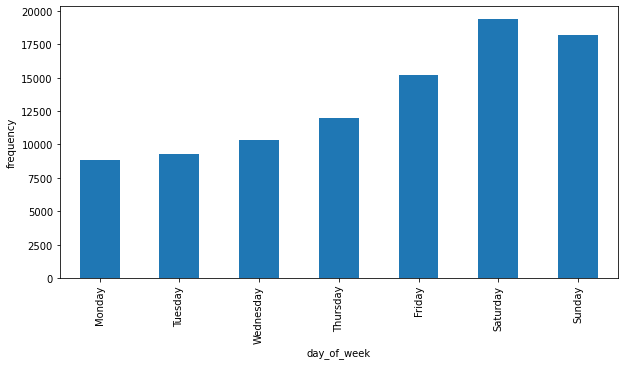

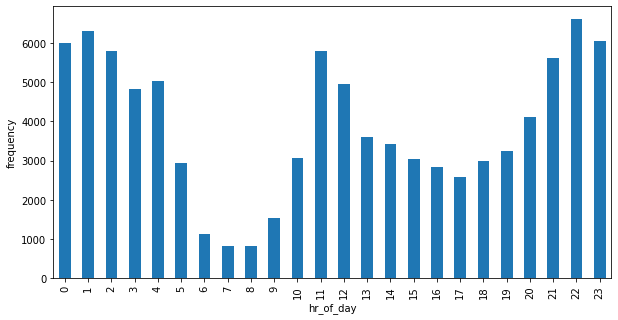

In [6]:
#4 Display the results in various ways

#a histogram of counts; poisson distribution with most common 15mincount being < 10

plt.figure(figsize=(10,5))
plt.hist(login_df_datetime.groupby('count').resample('15T')['login_time'].count(), bins = 75)
plt.axvline(login_df_datetime.groupby('count').resample('15T')['login_time'].count().median(), color = 'r', linestyle = 'dashed', linewidth = 4)
plt.xlabel('15mincount')
plt.ylabel('frequency')
plt.show()

#b time series of 15mincount; data is definitely periodic

plt.figure(figsize=(20,10))
plt.plot(grouped['login_time'],grouped['15mincount'])
plt.xlabel('login_time')
plt.ylabel('15mincount')
plt.show()

#c zoom into one section of the time-series - logins are most frequent 2 times a day - in late evening / early morning hours and again around noon
# considerable reduction in the login frequency around 6 am on some days
#zoomin = grouped[(grouped['login_time'] > '1970-02-24 00:00:00') & (grouped['login_time'] < '1970-03-02 00:00:00')]
zoomin = grouped[(grouped['login_time'] > '1970-03-31 00:00:00') & (grouped['login_time'] < '1970-04-07 00:00:00')]
plt.figure(figsize=(20,10))
plt.plot(zoomin['login_time'],zoomin['15mincount'])
plt.xlabel('login_time')
plt.ylabel('15mincount')
plt.show()

#d histogram of logins by days of week; weekends have considerably more logins; lowest login day is Monday and increases through the week

login_df_datetime['login_time'] = pd.to_datetime(login_df_datetime['login_time'])
login_df_datetime['day_of_week'] = login_df_datetime['login_time'].dt.day_name()
plt.figure(figsize=(10,5))
login_df_datetime['day_of_week'].value_counts().loc[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']].plot.bar()
plt.xlabel('day_of_week')
plt.ylabel('frequency')

#e histogram of logins by hours of day; confirms trend seen in 2nd zoomed in plot - most logins happening around lunch hours and from 10pm - 2am

login_df_datetime['hr_of_day'] = login_df_datetime['login_time'].dt.hour
plt.figure(figsize=(10,5))
login_df_datetime['hr_of_day'].value_counts().loc[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]].plot.bar()
plt.xlabel('hr_of_day')
plt.ylabel('frequency')

# Part 2 - Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way
toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

1. Answer

*   Key measure of success could be the amount of reimbursed toll costs per driver over a given period. That metric would have to be tracked as a part of the program. However it is uncertain whether you would have before-program implementation data to compare against to measure an increase.

*   Therefore, if it could be directly measured, it would be best to use the number of toll bridge crossings per driver per shift. I would choose this measure because it is the most direct way to measure if the drive partners are actually serving both cities both before and after program implementation and does not rely on human reporting.


2. Answer
*  a. Randomly select some of the drivers to participate in a trial program; the number of drivers in the trial should be determinated using a sample size calculator. Measure the bridge crossings over a specific period for both those drivers in the trial and those who are not; period should be full week increments (given the trends above) and over 2 business cycles to account for time for drivers to change their behaviours and other anomolies - perhaps holidays?
*   b. Since some drivers will be involved in the trial and others will not be, A/B testing could be used to measure if there is statistical significance between the bridge crossing in both test sets.  
*   If there is statistical significance, recommendations should be made to city operations team to implement the program; however a cost-benefit analysis may be needed to assure that reimbursements are not negatively affecting profits.  If there is no statistical significance, recommendations should not be made to city operations team to implement the program, but to study other methods of incentivizing drive partners to cover both cities.




# Part 3 - Predictive Modelling

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its longterm
rider retention (again, a few sentences will suffice).

In [64]:
#1 Load the json file directly into a pandas dataframe and show info; 3 fields have null values which need to be filled

ultimate_df = pd.read_json('/content/drive/My Drive/data/ultimate_data_challenge.json',orient='records')
print(ultimate_df.info())
ultimate_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB
None


,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [65]:
#1 Filling missing values

ultimate_df['avg_rating_of_driver'].fillna((ultimate_df['avg_rating_of_driver'].mean()), inplace=True)
ultimate_df['avg_rating_by_driver'].fillna((ultimate_df['avg_rating_by_driver'].mean()), inplace=True)

ultimate_df['phone'] = ultimate_df['phone'].fillna(ultimate_df['phone'].mode()[0])

print(ultimate_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    50000 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   50000 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    50000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB
None


In [66]:
#1 Getting the retention rate

# first must convert signup and last trip dates to date format
ultimate_df['signup_date'] = pd.to_datetime(ultimate_df['signup_date'])
ultimate_df['last_trip_date'] = pd.to_datetime(ultimate_df['last_trip_date'])

# then must figure out the date the data was extracted since this is not documented; assuming that the latest date in the last trip date column is a good proxy for this
print(ultimate_df['last_trip_date'].max()) #2014-07-01 00:00:00

# calculating 30 days prior to this
print(ultimate_df['last_trip_date'].max() - pd.Timedelta('30 days')) # 2014-06-01 00:00:00

# creating new column to identify active users
ultimate_df['active'] = np.where(ultimate_df['last_trip_date'] >= (ultimate_df['last_trip_date'].max() - pd.Timedelta('30 days')),1,0)
ultimate_df.head()

# calculating retention
ultimate_df_retention = (sum(ultimate_df['active'] == 1)) / (len(ultimate_df)) * 100
print('{} percent of users were retained.'.format(ultimate_df_retention))

2014-07-01 00:00:00
2014-06-01 00:00:00
37.608000000000004 percent of users were retained.


In [68]:
# 1 New active column will be the target variable; create dummy variables for other categoricals

#ultimate_df = pd.get_dummies(ultimate_df, columns = ['city', 'phone'])
#ultimate_df.head()
ultimate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trips_in_first_30_days  50000 non-null  int64         
 1   signup_date             50000 non-null  datetime64[ns]
 2   avg_rating_of_driver    50000 non-null  float64       
 3   avg_surge               50000 non-null  float64       
 4   last_trip_date          50000 non-null  datetime64[ns]
 5   surge_pct               50000 non-null  float64       
 6   ultimate_black_user     50000 non-null  bool          
 7   weekday_pct             50000 non-null  float64       
 8   avg_dist                50000 non-null  float64       
 9   avg_rating_by_driver    50000 non-null  float64       
 10  active                  50000 non-null  int64         
 11  city_Astapor            50000 non-null  uint8         
 12  city_King's Landing     50000 non-null  uint8 

Text(0.5, 1.0, 'Trips_First_30_days')

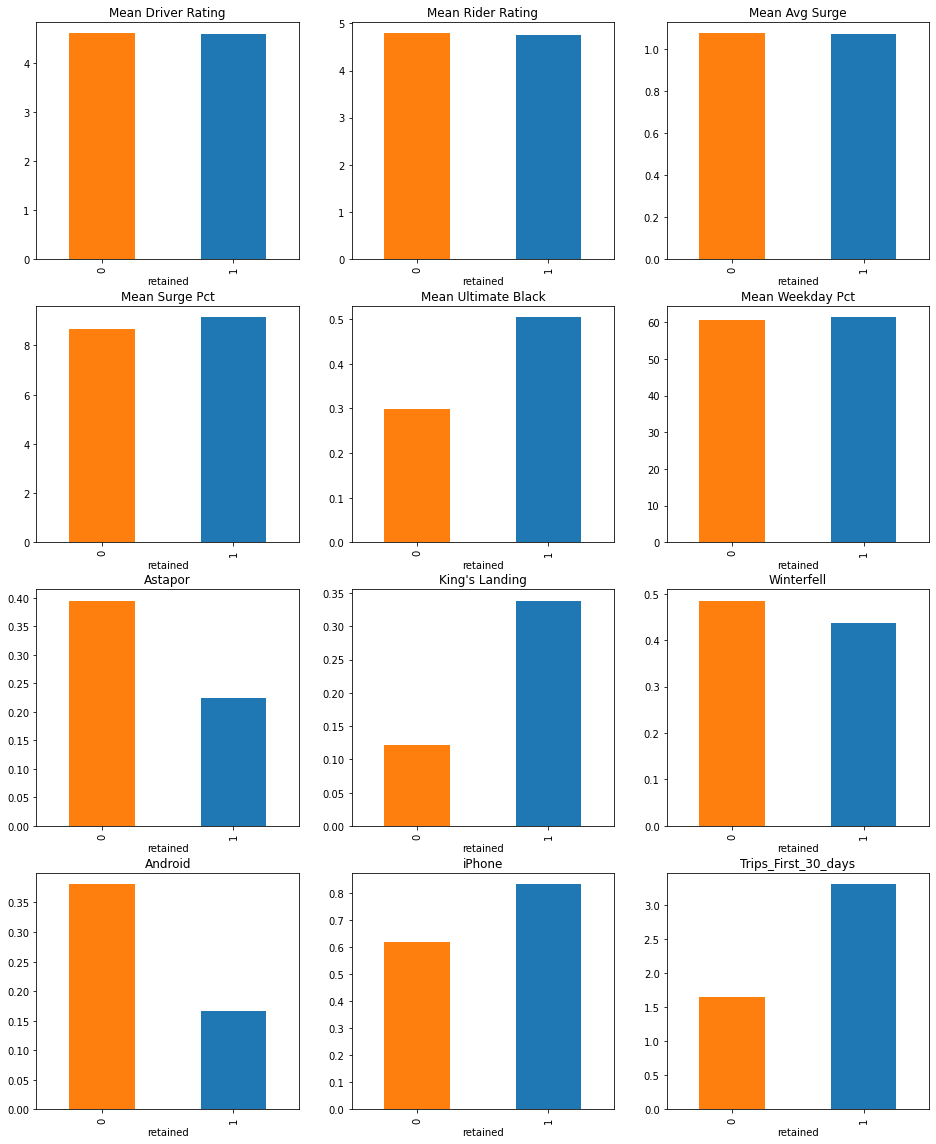

In [37]:
#1 EDA - Plotting averages for each column by whether active or not; ratings and when they are travelling are not as important as the city, whether
#they are Ultimate Black, what type of phone they use, and the number of trips they took in first 30 days in determining retention

plt.figure(figsize=(16,20))
plt.tight_layout(pad = 50)

plt.subplot(4,3,1)
retained_driverrtg = ultimate_df.groupby("active")['avg_rating_of_driver'].mean()
ax = retained_driverrtg.plot.bar(color=['C1','C0'])
plt.xlabel("retained")
ax.set_title('Mean Driver Rating');

plt.subplot(4,3,2)
retained_riderrtg = ultimate_df.groupby("active")['avg_rating_by_driver'].mean()
ax = retained_riderrtg.plot.bar(color=['C1','C0'])
plt.xlabel("retained")
ax.set_title('Mean Rider Rating')

plt.subplot(4,3,3)
retained_avg_surge = ultimate_df.groupby("active")["avg_surge"].mean()
ax = retained_avg_surge.plot.bar(color=['C1','C0'])
plt.xlabel("retained")
ax.set_title("Mean Avg Surge")

plt.subplot(4,3,4)
retained_surge_pct = ultimate_df.groupby("active")["surge_pct"].mean()
ax = retained_surge_pct.plot.bar(color=['C1','C0'])
plt.xlabel("retained")
ax.set_title("Mean Surge Pct")

plt.subplot(4,3,5)
retained_blk_user = ultimate_df.groupby("active")["ultimate_black_user"].mean()
ax = retained_blk_user.plot.bar(color=['C1','C0'])
plt.xlabel("retained")
ax.set_title("Mean Ultimate Black")

plt.subplot(4,3,6)
retained_weekday_pct = ultimate_df.groupby("active")["weekday_pct"].mean()
ax = retained_weekday_pct.plot.bar(color=['C1','C0'])
plt.xlabel("retained")
ax.set_title("Mean Weekday Pct")

plt.subplot(4,3,7)
retained_Astapor = ultimate_df.groupby("active")["city_Astapor"].mean()
ax = retained_Astapor.plot.bar(color=['C1','C0'])
plt.xlabel("retained")
ax.set_title("Astapor")

plt.subplot(4,3,8)
retained_city_KL = ultimate_df.groupby("active")["city_King's Landing"].mean()
ax = retained_city_KL.plot.bar(color=['C1','C0'])
plt.xlabel("retained")
ax.set_title("King's Landing")

plt.subplot(4,3,9)
retained_Winterfell = ultimate_df.groupby("active")["city_Winterfell"].mean()
ax = retained_Winterfell.plot.bar(color=['C1','C0'])
plt.xlabel("retained")
ax.set_title("Winterfell")

plt.subplot(4,3,10)
retained_Android = ultimate_df.groupby("active")["phone_Android"].mean()
ax = retained_Android.plot.bar(color=['C1','C0'])
plt.xlabel("retained")
ax.set_title("Android")

plt.subplot(4,3,11)
retained_iPhone = ultimate_df.groupby("active")["phone_iPhone"].mean()
ax = retained_iPhone.plot.bar(color=['C1','C0'])
plt.xlabel("retained")
ax.set_title("iPhone")

plt.subplot(4,3,12)
retained_iPhone = ultimate_df.groupby("active")["trips_in_first_30_days"].mean()
ax = retained_iPhone.plot.bar(color=['C1','C0'])
plt.xlabel("retained")
ax.set_title("Trips_First_30_days")


2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

Pseudocode - Using a logistic regression algorithm as it is easy to implement, interpret, and train and will provide us with feature importance (in terms of coefficients) at the end.  However the best approach would be to try several  different types of algorithms to determine which one performs best in terms of time efficienty and accuracy.
1. Import required modules
2. Normalizing the scalar features as this may be important to determine feature importance via coefficient values
3. Split into train and test data
4. Build a base model and run using default params / score
5. Hypertune params using the training set and grid search CV to determine best params / score
6. compare scores between optimized and default models
7. Predict the test data and score
8. Plot feature importance


In [47]:
#1 Import required modules
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [69]:
#2 Normalizing pertinent features

#min_max_scaler = MinMaxScaler()

#norm_columns =['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver']
non_norm_columns = ['active', 'ultimate_black_user','city_Astapor',"city_King's Landing", 'city_Winterfell', 'phone_Android', 'phone_iPhone']
     
# Normalize the relevant features - creates a numpy array
#ultimate_df_subset = ultimate_df[['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver']].values
#ultimate_norm = min_max_scaler.fit_transform(ultimate_df_subset)
#type(ultimate_norm)

# Save the array into a dataframe
#ultimate_norm_df = pd.DataFrame(ultimate_norm, columns = norm_columns)
#ultimate_norm_df.head()

# add normalized dataframe to df_ml dataframe
ultimate_df_non_norm = pd.DataFrame(ultimate_df, columns = non_norm_columns)
ultimate_df_norm = pd.concat([ultimate_df_non_norm, ultimate_norm_df], axis=1)
ultimate_df_norm.head()

,active,ultimate_black_user,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
0,1,True,0,1,0,0,1,0.032,0.925,0.014286,0.154,0.462,0.022801,1.000
1,0,False,1,0,0,1,0,0.000,1.000,0.000000,0.000,0.500,0.051317,1.000
2,0,False,1,0,0,0,1,0.024,0.825,0.000000,0.000,1.000,0.004784,1.000
3,1,True,0,1,0,0,1,0.072,0.900,0.020000,0.200,0.800,0.014662,0.975
4,0,False,0,0,1,1,0,0.112,0.850,0.027143,0.118,0.824,0.019446,0.975


In [76]:
#3 Split into X, y, then split into train, test

feature_columns = ['trips_in_first_30_days', 'avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
 'surge_pct', 'ultimate_black_user', 'weekday_pct', 'city_Astapor',
 "city_King's Landing", 'city_Winterfell', 'phone_Android','phone_iPhone']

X = ultimate_df_norm[feature_columns]
y = ultimate_df_norm['active']

print(X.shape)
print(y.shape)

# Splitting into train, test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(50000, 13)
(50000,)
(35000, 13) (35000,)
(15000, 13) (15000,)


In [77]:
#4 Instantiate the model with default params (had to increase max iter due to lack of convergence with default of 100)
logreg = LogisticRegression(random_state=42, max_iter= 1000).fit(X_train, y_train)

print("score on train: "+ str(logreg.score(X_train, y_train)))
print("score on test: " + str(logreg.score(X_test, y_test)))

score on train: 0.7164857142857143
score on test: 0.7138


In [81]:
'''
#5 Hypertune params using the training set and grid search CV to determine best params / score
Best Parameters:  {'logreg__C': 0.001, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}
Best CV Score:  0.6933
    'logreg__solver': ['newton-cg', 'lbfgs', 'liblinear']
'''
pipe = Pipeline([('logreg',logreg)])
                 
# create grid 
param_grid = {
    'logreg__solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'logreg__penalty': ['l2'],
    'logreg__C': [100000, 10000, 1000, 100, 10, 1.0]
}

# apply grid to model
search = GridSearchCV(pipe, param_grid, cv=5)

gs_cvparams=GridSearchCV(pipe,param_grid=param_grid,cv=5,verbose=True)

print(gs_cvparams.fit(X_train,y_train))
print("Best Parameters: ", gs_cvparams.best_params_)
print("Best CV Score: ", round(gs_cvparams.best_score_,4))

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   30.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('logreg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=1000,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                           random_state=42,
                                               

In [82]:
#6 compare optimized model with default; very little difference but will use optimized model going forward 

logreg_final = LogisticRegression(random_state=42, max_iter= 1000, solver = 'lbfgs', C = 10000, penalty='l2').fit(X_train, y_train)

# predict the labels
y_opt_pred = logreg_final.predict(X_train)
# score model
score = metrics.accuracy_score(y_train, y_opt_pred)
# print accuracy
print("The resulting accuracy of the optimized classifier is {}.".format(round(score,4)))


# train unoptimized model
logreg.fit(X_train, y_train)
# predict the labels of unoptimized model
y_unopt_pred = logreg.predict(X_train)
# score model
un_score = metrics.accuracy_score(y_train, y_unopt_pred)
# print accuracy
print("The resulting accuracy of the unoptimized classifier is {}.".format(round(un_score,4)))

The resulting accuracy of the optimized classifier is 0.7183.
The resulting accuracy of the unoptimized classifier is 0.7165.


In [83]:
#7 Predict the test data and score with the optimized model

# predict the labels
y_opt_test = logreg_final.predict(X_test)
# score model
test_score = metrics.accuracy_score(y_test, y_opt_test)
# print accuracy
print("The resulting accuracy of the optimized classifier for the test set is {}.".format(round(test_score,4)))

The resulting accuracy of the optimized classifier for the test set is 0.7153.


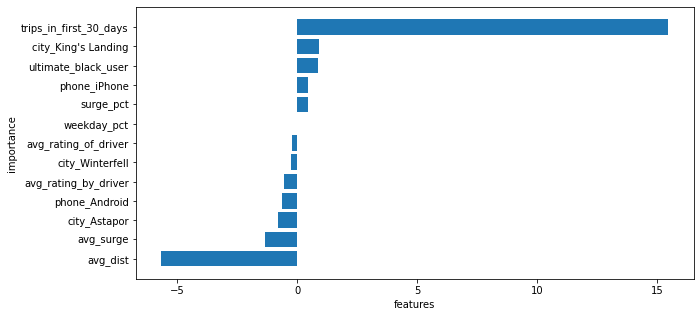

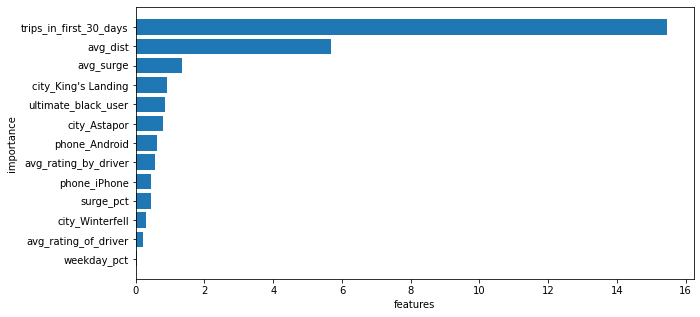

In [85]:
#8 Plot feature importance; trips in first 30 days (positively correlated), average distance (negatively correlated), 
# and average surge (negatively correlated) are the most important features for predicting retention
# Please note that this analysis was performed on model results un-scaled and the answers were quite different indicating the 
# importance of normalizing the features 

importance = logreg_final.coef_
abs_imp = np.abs(importance)
imp_lst = list(importance.flatten())
abs_imp_lst = list(abs_imp.flatten())
#print(imp_lst)

feat_imp_df = pd.DataFrame({'name': feature_columns, 'importance': imp_lst})
feat_imp_sortd = feat_imp_df.sort_values(by = 'importance', ascending = 'False')

feat_imp_abs_df = pd.DataFrame({'name': feature_columns, 'importance': abs_imp_lst})
feat_imp_abs_sortd = feat_imp_abs_df.sort_values(by = 'importance', ascending = 'False')

plt.figure(figsize=(10,5))
plt.barh(feat_imp_sortd['name'],feat_imp_sortd['importance'])
plt.xlabel('features')
plt.ylabel('importance')
plt.show()

plt.figure(figsize=(10,5))
plt.barh(feat_imp_abs_sortd['name'],feat_imp_abs_sortd['importance'])
plt.xlabel('features')
plt.ylabel('importance')
plt.show()

3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

a. Ultimate should focus on promotions that encourage new users to use the service more often once they enroll and discounts to users for short trip distances as these have a major influcence on retention.
b. They may want to also encourage enrollment in their Black Ultimate program to avoid the negative effects that surge pricing tends to have on retention.
c. They may want to focus less on areas of service, driver or rider ratings and times users are riding (other than surge times) as these features do not appear to have as much influence on retention.